**Zestaw 7 Zad 3:**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000)
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2)

labels = np.asarray([[1., 0.]] * len(x_label1) + [[0.,1.]] * len(x_label2))

In [ ]:
xs = xs.reshape(-1, 1)
ys = ys.reshape(-1, 1)

data_points = np.concatenate([xs, ys], axis = 1)

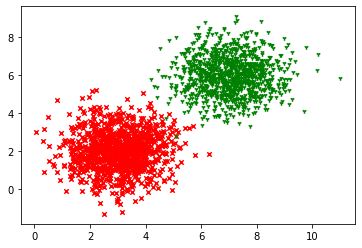

In [ ]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

In [ ]:
loss_fn = tf.keras.losses.BinaryCrossentropy()

In [ ]:
data_points.shape
print(data_points)

[[2.33483823 3.99862268]
 [3.15362804 1.88045117]
 [1.83559697 1.25779984]
 ...
 [5.9761354  6.54616858]
 [5.40401114 6.98053935]
 [7.20576367 5.19979621]]


In [ ]:
dataSubset = data_points[1000:]
dataSubset.shape
print(dataSubset)

[[5.91465993 5.38049064]
 [7.09158197 6.65932146]
 [6.94692124 4.99624503]
 ...
 [5.9761354  6.54616858]
 [5.40401114 6.98053935]
 [7.20576367 5.19979621]]


In [ ]:
def subset_dataset (data, subset_size):
  arr = np.arange(len(data))
  subData = [data[i] for i in arr [0:subset_size]]
  return subData

1.7681208848953247
1.433449625968933
1.1210031509399414
0.8447110652923584
0.6198652386665344
0.4544515311717987
0.342433363199234
0.2689155042171478
0.21987026929855347
0.1858655959367752
0.16127538681030273
0.14280132949352264
0.12846313416957855
0.11702769994735718
0.10769744962453842
0.09993786364793777
0.09337920695543289
0.0877583846449852
0.0828835517168045
0.07861173152923584
0.07483425736427307
0.07146717607975006
0.06844460219144821
0.06571412086486816
0.06323348730802536
0.06096837297081947
0.058890484273433685
0.05697634443640709
0.055206313729286194
0.05356380715966225
0.05203475058078766
0.05060708895325661
0.04927046224474907
0.04801589995622635
0.04683559760451317
0.045722734183073044
0.04467131942510605
0.04367607459425926
0.04273230582475662
0.04183587804436684
0.040983058512210846
0.04017053544521332
0.03939532861113548
0.03865474462509155
0.03794635459780693
0.03726796805858612
0.03661758452653885
0.035993389785289764
0.03539372235536575
0.03481706604361534
0.034262

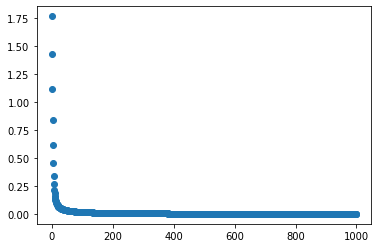

In [ ]:
w = tf.Variable(np.random.random((2, 2)))
b = tf.Variable(np.random.random((2)))
Loss = []

epochs = 1000
learning_rate = 0.1
batch_size = 500

dataSubset = subset_dataset(data_points, batch_size)
labelsSubset = subset_dataset(labels, batch_size)
#print(len(dataSubset))
#print(len(labels))

for _ in range(epochs):
  with tf.GradientTape() as tape:
    labels_model = tf.sigmoid(tf.matmul(dataSubset, w)+b)
    loss = loss_fn(labelsSubset, labels_model)
    print(loss.numpy())
    Loss.append(loss.numpy())
 
  dloss_dw,dloss_db = tape.gradient(loss,(w,b))
 
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)

plt.scatter(np.arange(epochs), Loss)
plt.show()

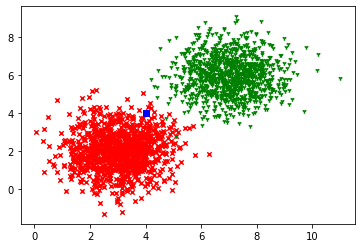

In [ ]:
x=4.0
y=4.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter([x],[y],c='b', marker='s')
plt.show()